### Machine Learning I - Fase 2


Nome: **Marcel Luís dos Santos Albuquerque**

### Aplicação e validação de algoritmos de Machine Learning


Nesta fase, o objetivo é usar os dados preparados na fase anterior para construir um classificador binário. Use o atributo invertebrae_origins (com os valores: native e non-native) como classe. Se for necessário selecionar ainda mais os atributos para que o classificador funcione melhor, comente as suas escolhas e a necessidade desse novo filtro.


Experimente ao menos 4 dos algoritmos vistos em aula para classificação. Obrigatoriamente, dentre esses 4 você deve incluir **Árvores de Decisão** e **MultiLayer Perceptron**. Explore os hiperparâmetros dos algoritmos visando a obtenção de melhores resultados.


#### 1) Tratamento da coluna alvo desbalanceada


A coluna alvo “invertebrate_origins” está desbalanceada. Você precisa balanceá-la usando alguma técnica vista em aula.

In [1]:
# Insira seu código aqui.
# Você pode criar células de código adicionais


# TODO
# 1) Balanceamento da coluna alvo

##### Carregando o dataset tratado da Fase 1

In [2]:
import pandas as pd

# Carregando e lendo o arquivo CSV
df = pd.read_csv('../data/processed/dataset_fase1_tratado.csv')

# Visualizando as 5 primeiras linhas
print(df.head())

   municipality  state  country  veg_landuse_type_point_level1  \
0             3      9        1                              9   
1             3      9        1                              9   
2             3      9        1                              9   
3             3      9        1                              9   
4             3      9        1                              9   

   veg_landuse_type_point_level2  veg_landuse_type_buffer5km_level1  \
0                             39                                  7   
1                             39                                  7   
2                             39                                  7   
3                             39                                  7   
4                             39                                  7   

   veg_landuse_type_buffer5km_level2  temperature  relative_humidity  \
0                                  6         25.0               65.0   
1                               

##### Verificando a coluna alvo invertebrate_origins

In [3]:
# Verificando a presença das classes
print(df['invertebrate_origins'].value_counts())

# Checando se existem valores inválidos (como 0)
print("Valores únicos encontrados:", df['invertebrate_origins'].unique())

invertebrate_origins
1    11094
0     5288
2     2040
Name: count, dtype: int64
Valores únicos encontrados: [1 2 0]


- Insights: o valor '0' está presente e não faz parte da classificação binária esperada (1 = native, 2 = non-native).
- Próximos passos: remover as registros com invertebrate_origins = 0, pois não representam a classe native ou non-native. Manter essas linhas prejudicaria a performance do classificador e as métricas de avaliação.

##### 1.1) Balanceamento da coluna alvo

In [4]:
from sklearn.utils import resample

# Removendo registros com classe inválida (0)
df = df[df['invertebrate_origins'].isin([1, 2])]

# Separando os dados por classe
df_majority = df[df['invertebrate_origins'] == 1]  # native
df_minority = df[df['invertebrate_origins'] == 2]  # non-native

# Oversampling da classe minoritária
df_minority_oversampled = resample(
    df_minority,
    replace=True,                
    n_samples=len(df_majority), 
    random_state=42
)

# Combinando as classes balanceadas
df_balanceado = pd.concat([df_majority, df_minority_oversampled])

# Verificando nova distribuição
print(df_balanceado['invertebrate_origins'].value_counts())

invertebrate_origins
1    11094
2    11094
Name: count, dtype: int64


#### 2) Escolha dos algoritmos e exploração dos hiper-parâmetros


Agora, você precisa escolher 2 algoritmos de classificação, junto com Árvore de decisão e MLP, e o conjunto de hiper parâmetros que será explorado.


In [5]:
# Insira seu código aqui.
# Você pode criar células de código adicionais

# TODO
# 1) Criação dos modelos Árvore de decisão, MLP e mais dois algoritmos de sua escolha
# 2) Definição do cojunto de hiper-parâmetros a serem explorados (use GridSearch)
#     Link de referência: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html
# 3) Execução da exploração dos hiper-parâmetros e escolhe dos melhores estimadores

##### 2.1) Criação dos modelos Árvore de decisão, MLP e mais dois algoritmos de sua escolha

Modelos obrigatórios:
- Árvore de Decisão (DecisionTreeClassifier)
- MLP - MultiLayer Perceptron (MLPClassifier)

Dois modelos adicionais escolhidos:
- Random Forest (RandomForestClassifier)
- Regressão Logística (LogisticRegression)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Definindo os classificadores com configuração inicial (sem ajuste ainda)
modelos = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=500)
}

##### 2.2) Definição do cojunto de hiper-parâmetros a serem explorados (use GridSearch)

In [7]:
# Árvore de Decisão (DecisionTreeClassifier)
parametro_dt = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

In [8]:
# MLP - MultiLayer Perceptron (MLPClassifier)
parametro_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

In [9]:
# Random Forest (RandomForestClassifier)
parametro_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

In [10]:
# Regressão Logística (LogisticRegression)
parametro_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

In [11]:
# Dicionário de parâmetros para cada modelo
parametros_grid = {
    'DecisionTree': parametro_dt,
    'MLP': parametro_mlp,
    'RandomForest': parametro_rf,
    'LogisticRegression': parametro_lr
}

##### 2.3) Execução da exploração dos hiper-parâmetros e escolhe dos melhores estimadores

In [12]:
# Separando atributos e rótulo
X = df_balanceado.drop(columns=['invertebrate_origins'])
y = df_balanceado['invertebrate_origins']

# Dividindo em treino e teste com estratificação
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Dicionários para salvar resultados
melhores_modelos = {}
resultados_grid = {}

# Iniciando GridSearch para os 4 modelos
for nome, modelo in modelos.items():
    print(f"\nIniciando GridSearch para: {nome}")

    grid = GridSearchCV(
        estimator=modelo,
        param_grid=parametros_grid[nome],
        scoring='f1_macro',     
        cv=5,                   
        n_jobs=-1,              
        verbose=1,
        refit=True              
    )
    
    grid.fit(X_train, y_train)  
    
    # Guardando os resultados
    melhores_modelos[nome] = grid.best_estimator_
    resultados_grid[nome] = grid

    print(f"Melhor F1_macro: {grid.best_score_:.4f}")
    print(f"Melhores parâmetros: {grid.best_params_}")


Iniciando GridSearch para: DecisionTree
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor F1_macro: 0.9986
Melhores parâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

Iniciando GridSearch para: MLP
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor F1_macro: 0.9831
Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

Iniciando GridSearch para: RandomForest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor F1_macro: 0.9988
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Iniciando GridSearch para: LogisticRegression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhor F1_macro: 0.9103
Melhores parâmetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


#### 3) Divisão dos subconjunto de dados de treino e teste, com estratificação




Agora, você precisa dividir os dados em subconjuntos de treino e teste. Para isso, você também deve fazer a divisão com a estratificação da coluna alvo.

O treinamento e teste devem ser feitos usando a técnica de validação cruzada.


In [14]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Divisão do dataset em treino e teste, com estratificação
# 2) Execução do treinamento e validação com Cross-Validation

##### 3.1) Divisão do dataset em treino e teste, com estratificação

> Essa etapa foi implementada na etapa/célula 2.3

##### 3.2) Execução do treinamento e validação com Cross-Validation

> Essa etapa também foi implementada na etapa/célula 2.3

#### 4) Análise dos resultado

Após a execução do treinamento e validação, você deve coletar as métricas de validação para problemas de classificação e compará-las entre os algoritmos.

Você deve coletar e plotar as métricas:
- Acurácia;
- Precisão;
- Recall;
- F1-Score;
- Matriz de confusão;

Após a plotagem dos resultado de forma gráfica, análise os resultados e tente identificar possíveis problemas de overfitting/underfitting, bem como os melhores algoritmos.


In [15]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Coleta das métricas de validação
# 2) Plotagem do resutaldos em gráficos
# 3) Análise textual dos resultados

##### 4.1) Coleta das métricas de validação

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dicionário para armazenar as métricas
metricas_resultados = {}

# Avaliando os melhores modelos no conjunto de teste
for nome, modelo in melhores_modelos.items():
    y_pred = modelo.predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    matriz_confusao = confusion_matrix(y_test, y_pred)

    # Armazenando os resultados
    metricas_resultados[nome] = {
        'Accuracy': acuracia,
        'Precision': precisao,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': matriz_confusao
    }

    # Exibindo os resultados
    print(f"\n{nome}")
    print(f"Accuracy:  {acuracia:.4f}")
    print(f"Precision: {precisao:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("Matriz de Confusão:")
    print(matriz_confusao)


DecisionTree
Accuracy:  0.9988
Precision: 0.9988
Recall:    0.9988
F1-Score:  0.9988
Matriz de Confusão:
[[3323    6]
 [   2 3326]]

MLP
Accuracy:  0.9848
Precision: 0.9849
Recall:    0.9848
F1-Score:  0.9848
Matriz de Confusão:
[[3303   26]
 [  75 3253]]

RandomForest
Accuracy:  0.9992
Precision: 0.9992
Recall:    0.9992
F1-Score:  0.9992
Matriz de Confusão:
[[3326    3]
 [   2 3326]]

LogisticRegression
Accuracy:  0.9073
Precision: 0.9115
Recall:    0.9073
F1-Score:  0.9071
Matriz de Confusão:
[[2853  476]
 [ 141 3187]]


##### 4.2) Plotagem do resutaldos em gráficos

<Figure size 1200x600 with 0 Axes>

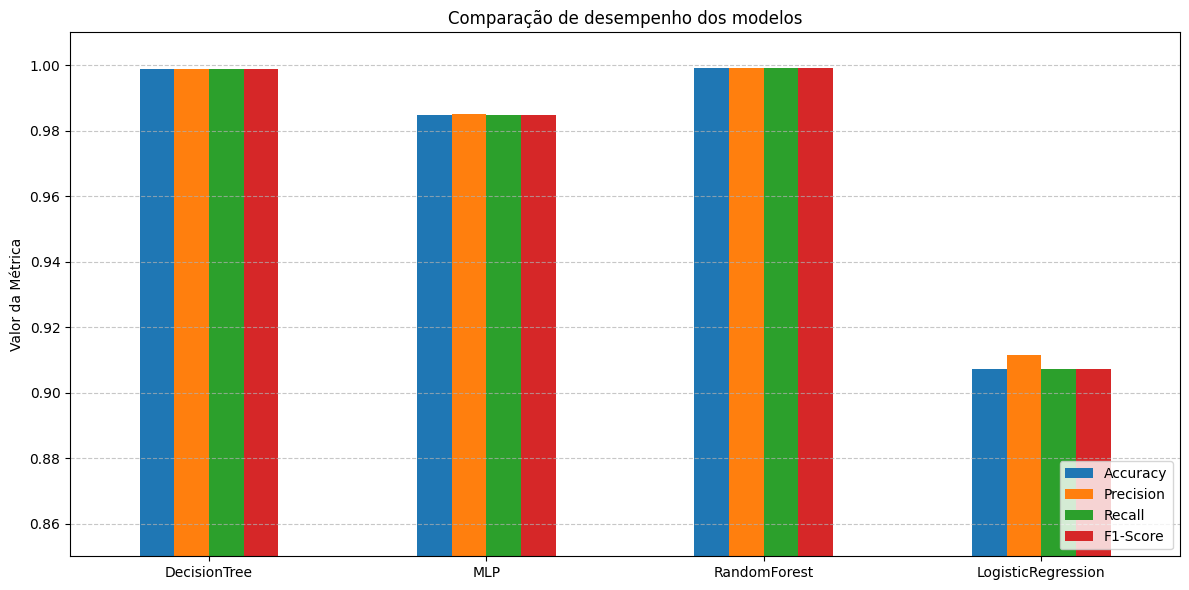

: 

In [ ]:
import matplotlib.pyplot as plt


# Transformando em DataFrame e removendo a matriz de confusão
df_metricas = pd.DataFrame.from_dict(metricas_resultados, orient='index')
df_metricas_display = df_metricas.drop(columns=['Confusion Matrix'])

# Exibindo as métricas em gráficos
plt.figure(figsize=(12, 6))
df_metricas_display.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Comparação de desempenho dos modelos")
plt.ylabel("Valor da Métrica")
plt.ylim(0.85, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

##### 4.3) Análise textual dos resultados

> Depois de testar os quatro modelos (Árvore de Decisão, MLP, Random Forest e Regressão Logística), vimos que eles tiveram desempenhos diferentes:
>
> - O Random Forest foi o que teve o melhor resultado geral. As métricas ficaram bem próximo da perfeição (acima de 99%) e a matriz de confusão mostrou pouquíssimos erros. Isso faz sentido, já que esse modelo junta várias árvores, o que ajuda a reduzir erros e tornar a previsão mais confiável.
>
> - A Árvore de Decisão também teve um ótimo desempenho, quase tão bom quanto o Random Forest. Mas como esse tipo de modelo tende a memorizar os dados de treino quando fica muito complexo, pode ser que esteja sofrendo de overfitting, ou seja, foi bem demais no treino, mas pode não se sair tão bem com dados novos.
>
> - O MLP teve um desempenho bom, mas abaixo dos modelos de árvore. Ele errou um pouco mais, principalmente ao não identificar corretamente alguns exemplos. Isso pode estar ligado à sensibilidade desse tipo de rede a ajustes finos e à necessidade de mais dados para treinar bem.
>
> - Já a Regressão Logística teve o pior desempenho. Embora as métricas ainda sejam aceitáveis (perto de 90%), ela errou muito mais do que os outros modelos. Isso mostra que ela tem dificuldade com dados mais complexos, como os que temos aqui.

### 5) Conclusão


Conclua seu estudo indicando o melhor algoritmo (modelo de IA) para o problema e comente os resultados alcançados. No caso de resultados ruins, comente e formule hipóteses para as possíveis causas.

> Após os testes com quatro modelos de classificação, o Random Forest foi o que teve o melhor desempenho. Ele alcançou métricas muito altas (acima de 99%), com quase nenhum erro na matriz de confusão. Isso mostra que ele conseguiu aprender muito bem os padrões dos dados.
>
> A Árvore de Decisão também teve desempenho muito bom, mas por ser um modelo mais propenso ao overfitting, ele pode ter decorado os dados de treino. Ainda assim, pode ser útil quando buscamos interpretabilidade e simplicidade.
>
> O MLP apresentou resultados bons, porém inferiores aos modelos de árvore. Isso pode indicar que ele precisa de mais dados e ajustes finos para atingir todo o seu potencial.
>
> A Regressão Logística foi a que teve mais dificuldade. Mesmo com métricas aceitáveis, ela errou muito mais e não conseguiu lidar bem com a complexidade dos dados.
>
> Apesar dos resultados impressionantes, ainda assim, acredito que é necessário cautela. A performance quase perfeita dos modelos pode mascarar problemas como overfitting ou algum viés nos dados. São pontos que merecem ser explorados em trabalhos futuros.
>
> Disto isto, no geral, o Random Forest se mostrou a escolha mais eficaz para resolver este problema.

# Check-List

Com isso, você completa a fase 2 da disciplina. Para auxiliar você a verificar se o trabalho está adequado para a entrega, criamos uma lista de item que devem ser satisfeitos ao final do trabalho.

- Balanceamento da coluna alvo;
- Utilização de 4 algoritmos de classificação, incluindo Árvore de decisão e MLP;
- Exploração dos hiper parâmetros dos algoritmos;
- Divisão do dataset em treino e teste, com estratificação na coluna alvo;
- Validação dos algoritmos usando cross-validation e coleta das métricas de avaliação (acurácia, precisão, recall, f1, matriz de confusão);
- Analise da matriz de confusão e métricas.
- Plotagem e análise textual sobre os resultados, indicando melhor modelo de IA;
- Conclusão do trabalho realizado, comentando os resultados e as dificuldades encontradas;
